In [23]:
import pandas as pd
import numpy as np

import yfinance as yf

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

For this notebook, we'll look at the day's top, positive movers. 

# Technical Analysis Strategies

Bollinger Bands
- By plotting bands two deviations above and two deviations below a moving average, typically 20 days, traders can use historical data to compare it to the current price.

# Sourcing Tickers

Here we'll just use Yahoo Finance's gainers at: https://finance.yahoo.com/gainers

In [24]:
r = requests.get('https://www.dogsofthedow.com/biggest-stock-gainers-today.htm')

In [25]:
html_results = pd.read_html(r.text)[0]
html_results

,Symbol,Company,Price 6-23-23,Gain Rank 6-23-23,1d Chg 6-23-23,1m Chg 6-23-23,12m Chg 6-23-23
0,CFMS,Conformis,2.17,1,87.1%,85.5%,-77.3%
1,WORX,Scworx,0.52,2,45.5%,86.6%,-24.9%
2,ONCS,OncoSec Medical,0.28,3,31.9%,-45.7%,-98.5%
3,CASA,Casa Systems,1.42,4,21.4%,20.3%,-65.3%
4,ADES,Advanced Emissions Solut,1.90,5,21.0%,37.7%,-59.2%
5,AAOI,Applied Optoelectronics,4.34,6,15.1%,152.3%,119.7%
6,SIEN,Sientra,2.55,7,14.9%,48.3%,-74.8%
7,EVLO,Evelo Biosciences,0.17,8,13.6%,21.2%,-91.6%
8,QUIK,QuickLogic,8.37,9,12.5%,44.8%,4.9%
9,PIRS,Pieris Pharmaceuticals,0.25,10,12.0%,-73.5%,-86.8%


In [26]:
def get_history(ticker, period):
    t = yf.Ticker(ticker)
    return t.history(period)

In [27]:
loop = 0
period = "12mo"
for s in html_results['Symbol']:
    if loop == 0:
        df = get_history(s, period=period)
        df['ticker'] = s
        loop +=1
    else:
        temp_df = get_history(s, period=period)
        temp_df['ticker'] = s
        df = pd.concat([df, temp_df])
        
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2022-06-24 00:00:00-04:00,9.575,9.850,9.075,9.650,11708,0.0,0.0,CFMS
2022-06-27 00:00:00-04:00,9.750,9.800,9.275,9.625,6132,0.0,0.0,CFMS
2022-06-28 00:00:00-04:00,9.750,9.850,8.775,8.925,16276,0.0,0.0,CFMS
2022-06-29 00:00:00-04:00,9.050,9.650,7.875,8.150,77956,0.0,0.0,CFMS
2022-06-30 00:00:00-04:00,8.275,9.125,8.250,8.850,26372,0.0,0.0,CFMS
...,...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,1.540,1.640,1.500,1.600,147300,0.0,0.0,MIRO
2023-06-20 00:00:00-04:00,1.680,1.680,1.620,1.620,22200,0.0,0.0,MIRO
2023-06-21 00:00:00-04:00,1.560,1.670,1.550,1.660,44400,0.0,0.0,MIRO


In [28]:
df.shape

(12550, 8)

# Plotting

<Axes: xlabel='Date'>

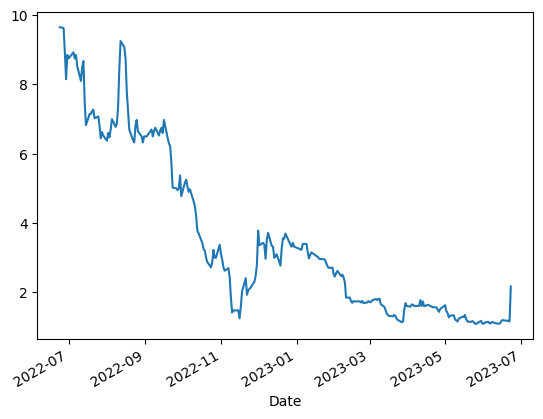

In [29]:
df[df['ticker']=='CFMS']['Close'].plot()

In [30]:
df[df['ticker']=='CFMS']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2022-06-24 00:00:00-04:00,9.575,9.850,9.075,9.650,11708,0.0,0.0,CFMS
2022-06-27 00:00:00-04:00,9.750,9.800,9.275,9.625,6132,0.0,0.0,CFMS
2022-06-28 00:00:00-04:00,9.750,9.850,8.775,8.925,16276,0.0,0.0,CFMS
2022-06-29 00:00:00-04:00,9.050,9.650,7.875,8.150,77956,0.0,0.0,CFMS
2022-06-30 00:00:00-04:00,8.275,9.125,8.250,8.850,26372,0.0,0.0,CFMS
...,...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,1.170,1.200,1.130,1.200,48600,0.0,0.0,CFMS
2023-06-20 00:00:00-04:00,1.150,1.210,1.150,1.180,46600,0.0,0.0,CFMS
2023-06-21 00:00:00-04:00,1.170,1.220,1.170,1.185,37200,0.0,0.0,CFMS


## Trend Analysis (Line of best fit)

In [31]:
def graph_trend(symbol):
    x=np.array([n for n in range(0,len(df[df['ticker']==symbol]))])
    y=np.array(df[df['ticker']==symbol]['Close'])
    a, b = np.polyfit(x, y, 1)
    df[df['ticker']==symbol]['Close'].plot()
    plt.plot(df[df['ticker']==symbol]['Close'].index, a*x+b)
    plt.title(symbol)

def get_trend_slope(symbol):
    x=np.array([n for n in range(0,len(df[df['ticker']==symbol]))])
    y=np.array(df[df['ticker']==symbol]['Close'])
    a, b = np.polyfit(x, y, 1)
    return a

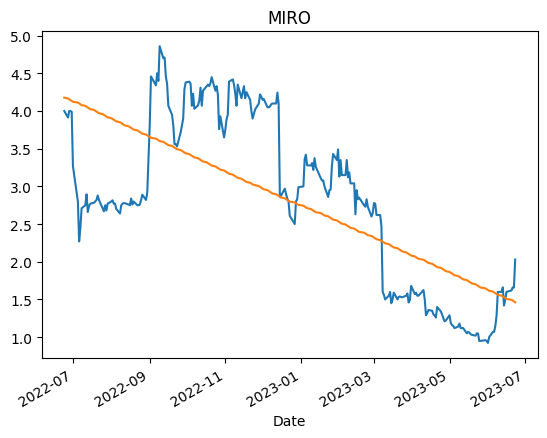

In [32]:
graph_trend('MIRO')

In [91]:
def find_positive_trends(df):
    for symbol in df['ticker'].unique():
        a = get_trend_slope(symbol)
        if a > 0:
            print(f'{symbol} a greater than 0: {a}')
            
find_positive_trends(df)

AAOI a greater than 0: 0.001630768376268808
CRBP a greater than 0: 0.0065660974612568165
CVV a greater than 0: 0.02893450971229595
ODP a greater than 0: 0.04915291795783062
LVOX a greater than 0: 0.0034787970698325304
ABCM a greater than 0: 0.007372710880575538


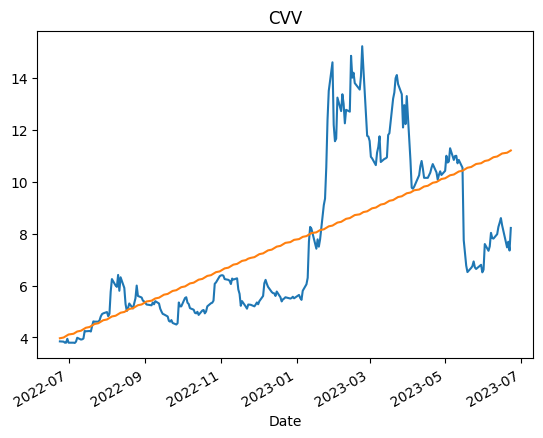

In [34]:
graph_trend('CVV')

## Trend Analysis (Bolinger Bands)

Bollinger Bands
- By plotting bands two deviations above and two deviations below a moving average, typically 20 days, traders can use historical data to compare it to the current price.

In [66]:
def plot_bolinger_bands(symbol, rolling_window):
    # get moving 20 day average
    close_series = df[df['ticker']==symbol]['Close']
    rolling = close_series.rolling(window=rolling_window)
    twenty_day_rolling = rolling.mean()
    standard_dev = rolling.std()
    upper_band = twenty_day_rolling + standard_dev*2
    lower_band = twenty_day_rolling - standard_dev*2
    # print(standard_dev)
    # Plot stuff
    plt.figure(figsize=(10,5))
    plt.plot(close_series, label='Close Price')
    plt.plot(twenty_day_rolling, label='Twenty Day Moving Average')
    plt.plot(upper_band, color='red', label='Upper Bolinger Band', linewidth=3)
    plt.plot(lower_band, color='red', label='Lower Bolinger Band', linewidth=3)
    plt.legend()
    

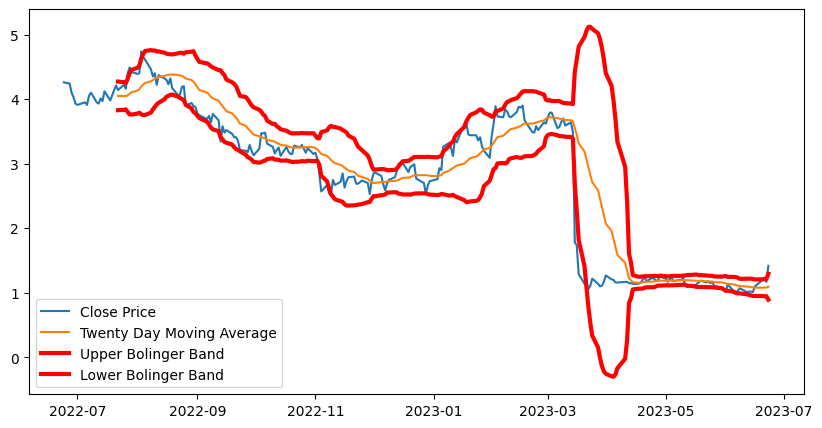

In [67]:
plot_bolinger_bands('CASA', 20)

In [37]:
# put 20 day moving average into dataframe
# put bolinger bands (upper and lower) into dataframe

In [84]:
def n_day_moving_average(df, rolling_window):
    """
    Calculates and creates twenty day moving average values into the dataframe
    """
    # reset the index to an array
    df.reset_index(inplace=True)
    for symbol in df['ticker'].unique():
        # get min and max index references to pass to .loc later
        idx_ref_min = min(df[df['ticker']==symbol].index)
        idx_ref_max = max(df[df['ticker']==symbol].index)
        
        close_series = df[df['ticker']==symbol]['Close']
        rolling = close_series.rolling(window=rolling_window)
        twenty_day_rolling = rolling.mean()
        
        # set twenty day rolling average at proper indexes for given symbol
        df.loc[idx_ref_min:idx_ref_max+1,'twenty_day_moving_average'] = twenty_day_rolling
        
    df.set_index('Date', inplace=True)
    return df
     
    
    
def bolinger_bands(df, rolling_avg_col, rolling_window):
    """
    Calculates and creates bolinger band values (upper and lower) into the dataframe
    """
    # reset the index to an array
    df.reset_index(inplace=True)
    for symbol in df['ticker'].unique():
        # get min and max index references to pass to .loc later
        idx_ref_min = min(df[df['ticker']==symbol].index)
        idx_ref_max = max(df[df['ticker']==symbol].index)
        
        n_day_rolling = df[df['ticker']==symbol][rolling_avg_col].rolling(window=rolling_window)
        standard_dev = n_day_rolling.std()
        
        # set twenty day rolling average at proper indexes for given symbol
        df.loc[idx_ref_min:idx_ref_max+1,'bolinger_upper_band'] = df.loc[idx_ref_min:idx_ref_max+1,rolling_avg_col] + standard_dev*2
        df.loc[idx_ref_min:idx_ref_max+1,'bolinger_lower_band'] = df.loc[idx_ref_min:idx_ref_max+1,rolling_avg_col] - standard_dev*2
        
    df.set_index('Date', inplace=True)

    return df
    

In [85]:
copy_df = df.copy()

In [86]:
tdmavg_df = n_day_moving_average(copy_df, rolling_window=20)
tdmavg_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,twenty_day_moving_average
Date,,,,,,,,,
2022-06-24 00:00:00-04:00,9.575,9.850,9.075,9.650,11708,0.0,0.0,CFMS,NaN
2022-06-27 00:00:00-04:00,9.750,9.800,9.275,9.625,6132,0.0,0.0,CFMS,NaN
2022-06-28 00:00:00-04:00,9.750,9.850,8.775,8.925,16276,0.0,0.0,CFMS,NaN
2022-06-29 00:00:00-04:00,9.050,9.650,7.875,8.150,77956,0.0,0.0,CFMS,NaN
2022-06-30 00:00:00-04:00,8.275,9.125,8.250,8.850,26372,0.0,0.0,CFMS,NaN
...,...,...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,1.540,1.640,1.500,1.600,147300,0.0,0.0,MIRO,1.19215
2023-06-20 00:00:00-04:00,1.680,1.680,1.620,1.620,22200,0.0,0.0,MIRO,1.22165
2023-06-21 00:00:00-04:00,1.560,1.670,1.550,1.660,44400,0.0,0.0,MIRO,1.25365


In [87]:
tdmavg_df[tdmavg_df['ticker']=='CASA']['twenty_day_moving_average'].rolling(window=20).std()

Date
2022-06-24 00:00:00-04:00         NaN
2022-06-27 00:00:00-04:00         NaN
2022-06-28 00:00:00-04:00         NaN
2022-06-29 00:00:00-04:00         NaN
2022-06-30 00:00:00-04:00         NaN
                               ...   
2023-06-16 00:00:00-04:00    0.036283
2023-06-20 00:00:00-04:00    0.036257
2023-06-21 00:00:00-04:00    0.035623
2023-06-22 00:00:00-04:00    0.034466
2023-06-23 00:00:00-04:00    0.032103
Name: twenty_day_moving_average, Length: 251, dtype: float64

In [88]:
bol_band_df = bolinger_bands(tdmavg_df, 'twenty_day_moving_average', rolling_window=20)
bol_band_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,twenty_day_moving_average,bolinger_upper_band,bolinger_lower_band
Date,,,,,,,,,,,
2022-06-24 00:00:00-04:00,9.575,9.850,9.075,9.650,11708,0.0,0.0,CFMS,NaN,NaN,NaN
2022-06-27 00:00:00-04:00,9.750,9.800,9.275,9.625,6132,0.0,0.0,CFMS,NaN,NaN,NaN
2022-06-28 00:00:00-04:00,9.750,9.850,8.775,8.925,16276,0.0,0.0,CFMS,NaN,NaN,NaN
2022-06-29 00:00:00-04:00,9.050,9.650,7.875,8.150,77956,0.0,0.0,CFMS,NaN,NaN,NaN
2022-06-30 00:00:00-04:00,8.275,9.125,8.250,8.850,26372,0.0,0.0,CFMS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,1.540,1.640,1.500,1.600,147300,0.0,0.0,MIRO,1.19215,1.287341,1.096959
2023-06-20 00:00:00-04:00,1.680,1.680,1.620,1.620,22200,0.0,0.0,MIRO,1.22165,1.328918,1.114382
2023-06-21 00:00:00-04:00,1.560,1.670,1.550,1.660,44400,0.0,0.0,MIRO,1.25365,1.380007,1.127293


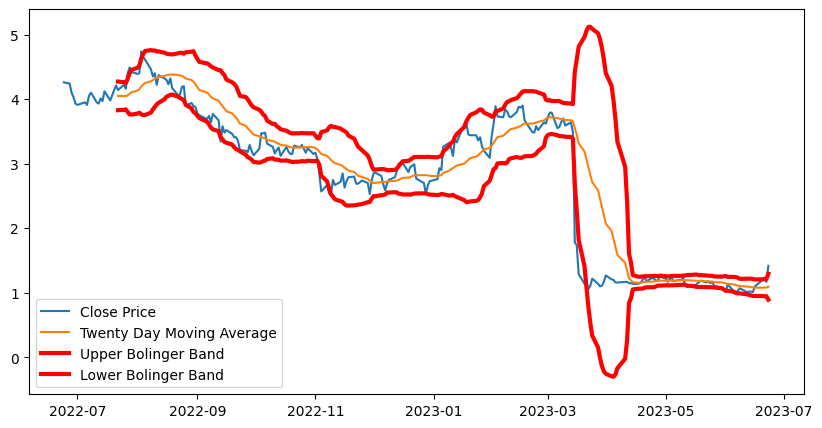

In [58]:
plot_bolinger_bands('CASA', 20)

# Investigating Interactive Plotting

Using plotly

In [43]:
import plotly

In [55]:
import plotly.express as px

fig = px.line(bol_band_df[bol_band_df['ticker']=='MIRO']['Close'])
fig.show()

You can just use the plotting backend for pandas as Plotly with the below!

In [45]:
pd.options.plotting.backend = "plotly"

In [46]:
# bol_band_df[bol_band_df['ticker']=='CASA']['Close'].plot()
# bol_band_df[bol_band_df['ticker']=='CASA'][['Close', 'twenty_day_moving_average', 'bolinger_upper_band', 'bolinger_lower_band']].plot()

In [89]:
bol_band_df[bol_band_df['ticker']=='CASA'][['Close', 'twenty_day_moving_average', 'bolinger_upper_band', 'bolinger_lower_band']].plot()

In [113]:
def plotly_plot_bolinger(df, symbol):
    pd.options.plotting.backend = "plotly"
    fig = df[df['ticker']==symbol][['Close', 'twenty_day_moving_average', 'bolinger_upper_band', 'bolinger_lower_band']].plot(title=symbol)
    fig.show()

In [114]:
plotly_plot_bolinger(bol_band_df, 'CASA')

# What to do with this information?

- The price dipping below the lower bolinger band indicates the stock will be falling in price
- The inverse is also true, indicating the price will increase
- The caveat is how long does it have to stay above to indicate a trend?

Let's look at today's symbol wiht the highest trend numbers as derived in `find_positive_trends()`

In [92]:
find_positive_trends(bol_band_df)

AAOI a greater than 0: 0.001630768376268808
CRBP a greater than 0: 0.0065660974612568165
CVV a greater than 0: 0.02893450971229595
ODP a greater than 0: 0.04915291795783062
LVOX a greater than 0: 0.0034787970698325304
ABCM a greater than 0: 0.007372710880575538


In [93]:
# here we look at the symbol with the most positive trend slope
bol_band_df[bol_band_df['ticker']=='ODP'][['Close', 'twenty_day_moving_average', 'bolinger_upper_band', 'bolinger_lower_band']].plot()

Let's add to the dataset a categorical variable that sees if the daily price is above, below, or between the bolinger bands.

In [116]:
odp_df = bol_band_df[bol_band_df['ticker']=='ODP']

conditions = [
    # where close price is higher then the upper band
    odp_df['Close']>odp_df['bolinger_upper_band'],
    # where the close price is between the bands
    (odp_df['Close'] < odp_df['bolinger_upper_band']) & (odp_df['Close'] > odp_df['bolinger_upper_band']),
    # where the close price is less than the lower band
    odp_df['Close']<odp_df['bolinger_lower_band']
    ]

choices = [1,0,-1]

# odp_df['bol_relative_price'] = np.select(conditions, choices, default=np.nan)
relative = np.select(conditions, choices)

So now I have an array, by day, of the relative price to the bolinger bands. Let's see what happens if we sum it.

In [117]:
relative.sum()

15

In [131]:
px.violin(relative, orientation='v')

In [155]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

x_axis=bol_band_df[bol_band_df['ticker']=='ODP'].index

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=x_axis, y=bol_band_df[bol_band_df['ticker']=='ODP']['Close'], name='Close Price'),
    )
fig.add_trace(
    go.Scatter(x=x_axis, y=bol_band_df[bol_band_df['ticker']=='ODP']['twenty_day_moving_average'], name='20-day Moving Avg.'),
    )
fig.add_trace(
    go.Scatter(x=x_axis, y=bol_band_df[bol_band_df['ticker']=='ODP']['bolinger_upper_band'], name='Bolinger Upper Band'),
    )
fig.add_trace(
    go.Scatter(x=x_axis, y=bol_band_df[bol_band_df['ticker']=='ODP']['bolinger_lower_band'], name='bolinger_lower_band'),
    )
fig.add_trace(
    go.Bar(x=x_axis, y=relative, name='Bolinger-relative Close'),
    secondary_y=True
)



When the bolinger bands are diverging, the price is trending (in either direction).

What does it look like if I look at the divergence rate and if the trend of the moving average is positive?\
    - How to calculate divergence rate?



BOLLINGER BANDS RULES = https://www.bollingerbands.com/bollinger-band-rules

# Web Interface Testing

In [2]:
import analysis
import json
from flask import Flask, render_template
import plotly

df = analysis.get_biggest_gainers()

# Assemble their history
built_df = analysis.build_stocks_df(df)

# Get moving average and bolinger bands
ma_df = analysis.n_day_moving_average(built_df, 20)
bol_df = analysis.bolinger_bands(ma_df, '20_day_moving_average', 20)

# make a graph
trace = analysis.plotly_plot_bolinger(bol_df, bol_df['ticker'][0], 20)
data = [trace]
graphJSON = json.dumps(data, cls=plotly.utils.PlotlyJSONEncoder)
# return render_template('index.html',
#                         graphJSON=graphJSON)

In [16]:
trace.show()

TypeError: JSONDecoder.__init__() got an unexpected keyword argument 'csl'

In [8]:
type(dict(graphJSON))

ValueError: dictionary update sequence element #0 has length 1; 2 is required